In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1, Part 1.1

Transition Matrix: we order the states as (U, E, D).

$$
\left(\begin{array}{ccc}
1-\alpha-\beta & \alpha & \beta\\
\gamma & 1-\gamma & 0\\
\delta & \epsilon & 1-\delta-\epsilon
\end{array}\right)
$$


In [10]:
# Define the constants
alpha = 0.4
beta = 0.1
gamma = 0.2
epsilon = 0.001
delta = 0.1

# Construct the Markov matrix
P = np.zeros((3, 3))
P[0, :] = [1 - alpha - beta, alpha, beta]
P[1, :] = [gamma, 1 - gamma, 0]
P[2, :] = [delta, epsilon, 1 - delta - epsilon]

In [11]:
# Compute the evolution of the distribution
def Markov_simulation_dist(P, ini_dist, T):
    n = len(ini_dist)
    res = np.zeros((T, n)) # initialize the result
    res[0, :] = ini_dist # starting point
    for i in range(T - 1):
        res[i + 1, :] = res[i, :] @ P
        
    return res

ini_dist = np.array([1, 0, 0])
T = 40
res = Markov_simulation_dist(P, ini_dist, T)

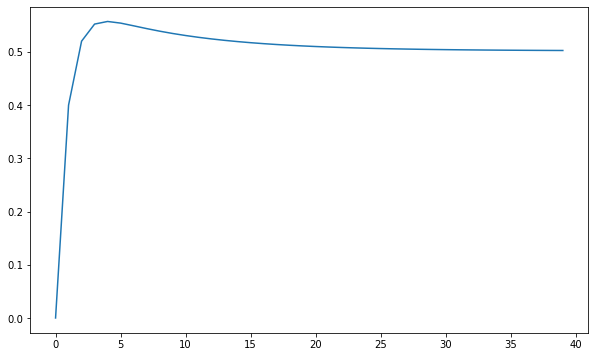

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(res[:, 1])
plt.show()

In [15]:
# A different starting point?
ini_dist = [0, 0, 1.0]
T = 5
res = Markov_simulation_dist(P, ini_dist, T)

In [16]:
print("The probability that the worker is employed at period 4 is", res[4, 1])

The probability that the worker is employed at period 4 is 0.13700745349900004


In [18]:
# Compute the stationary distribution
w, v = np.linalg.eig(P.T)
tmp = v[:, np.isclose(w, 1)][:, 0]
sta_dist = tmp / np.sum(tmp)

print("The stationary distribution is", sta_dist)

The stationary distribution is [0.25030979 0.50185874 0.24783147]


# Question 1, Part 1.2

In [26]:
# Single agent simulation
def Markov_simulation_single(P, ini_state, T):
    res = np.zeros(T, dtype = int) # Initialize the result record
    res[0] = ini_state
    prob_draw = np.random.rand(T) # Draw all the probabilities in a row
    cum_prob = np.cumsum(P, axis = 1)
    for i in range(T - 1):
        res[i + 1] = np.searchsorted(cum_prob[res[i], :], prob_draw[i])
        
    return res

ini_state = 0
T = 10000
simulation_res = Markov_simulation_single(P, 0, T)

In [27]:
# Compute \bar_X
current_sum = 0
average_employed = np.zeros(T)
for i in range(T):
    current_sum +=  (simulation_res[i] == 1)
    average_employed[i] = current_sum / (i + 1)

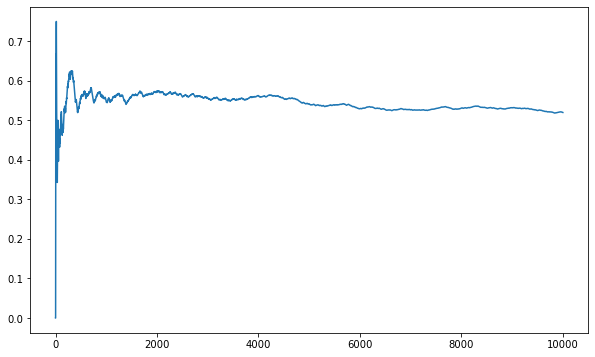

In [28]:
plt.figure(figsize = (10, 6))
plt.plot(average_employed)
plt.show()

The ergodicity of Markov chain and the law of large numbers imply that the average number converges to the stationary distribution.

In [29]:
average_wage = np.zeros(T)
current_sum = 0
for i in range(T):
    current_sum +=  (simulation_res[i] == 1) * 1 + (simulation_res[i] != 1) * 0.2
    average_wage[i] = current_sum / (i + 1)

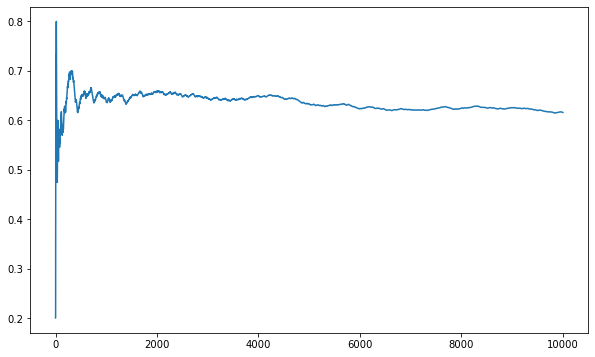

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(average_wage)
plt.show()

It converges to $W_{E} \cdot \Pr\left(E\right) + W_{U} \cdot \Pr\left(U\right) + W_{D} \cdot \Pr\left(D\right)$

# Question 2

We order the states as (S, I, R). Therefore the transition matrix is (for period t)

$$
\left(\begin{array}{ccc}
1-\beta\tilde{I}_{t} & \beta\tilde{I}_{t} & 0\\
0 & 1-\gamma & \gamma\\
0 & 0 & 1
\end{array}\right)
$$


In [6]:
# Define the constants
beta = 0.4
gamma = 0.15
ini_dist = [0.98, 0.02, 0] # Order the states by S, I, and R

# The evolution of the distribution
T = 100
res = np.zeros((T, 3)) # initialize the result
res[0, :] = ini_dist # starting point
for i in range(T - 1):
    P = np.zeros((3, 3))
    P[0, 0] = 1 - beta * res[i, 1]
    P[0, 1] = beta * res[i, 1]
    P[1, 1] = 1 - gamma
    P[1, 2] = gamma
    P[2, 2] = 1.0
    res[i + 1, :] = res[i, :] @ P


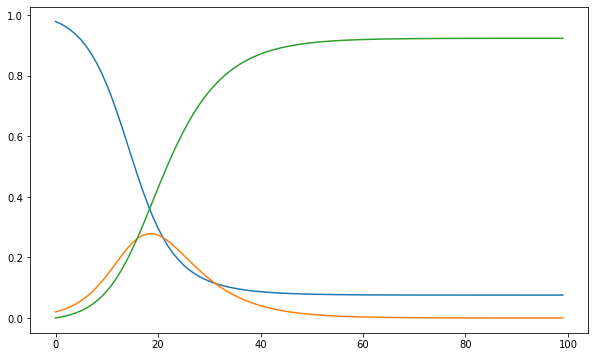

In [7]:
plt.figure(figsize = (10, 6))
plt.plot(res)
plt.show()